In [1]:
from pylab import *
import numpy as np
import scipy as si
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
plt.rcParams['text.usetex'] = True
#plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 14

Computational analysis of the behaviour of a collection of particles in a box that satisfy Newtonian mechanics             
and interact via the Lennard-Jones potential, varying the total number of particles N and the initial conditions :          
$\qquad$a) Study of local number density in the equilibrium state                                                                     
$\qquad\qquad$(i) average$\qquad$(ii) fluctuations                                          
$\qquad$b) Study of transient behaviour of the system (approach to equilibrium)                                                             
$\qquad$c) Relationship of large N and the arrow of time                                                                                 
$\qquad$d) Computation of the velocity distribution of particles for the system and comparison with the Maxwell velocity distribution                                                                                                                      
$\qquad$e) Computation and study of mean molecular speed and its dependence on particle mass                                                     
$\qquad$f) Computation of fraction of molecules in an ideal gas having speed near the most probable speed


Lennard-Jones potential 

$\qquad\displaystyle{V(r)=4\epsilon\left[\left(\frac{\sigma}{r}\right)^{12}-\left(\frac{\sigma}{r}\right)^{6}\right]}$

To satisfy Newtonian mechanics  

$\qquad\displaystyle{F=-\nabla V}$

$r_k=(k-0.5)dr \quad k =1,2,3,...$

$ N^{ideal}(r_k) =\frac{4\pi(N-1)}{3V}[3k^2-3k+1]dr^3$

$g(r_k)=\frac{\langle N(r_k) \rangle }{N^{ideal}(r_k)}$

Compute the partition function $Z(\beta)$ for examples of systems with a finite number of single particle levels (e.g., 2 level, 3 level, etc.)                                                                                               
and a finite number of non-interacting particles $N$ under Maxwell-Boltzmann, Fermi-Dirac and Bose-Einstein statistics :    
$\qquad$ a) Study of how $Z(\beta)$, average energy $\langle E\rangle$, energy fluctuation $\Delta E$, specific heat at constant volume $C_V$,                                                                                                                
$\qquad\quad$depend upon the temperature, total number of particles N and the spectrum of single particle states.                   
$\qquad$ b) Ratios of occupation numbers of various states for the systems considered above                                         
$\qquad$ c) Computation of physical quantities at large and small temperature $T$ and comparison of various statistics at large and small temperature $T$


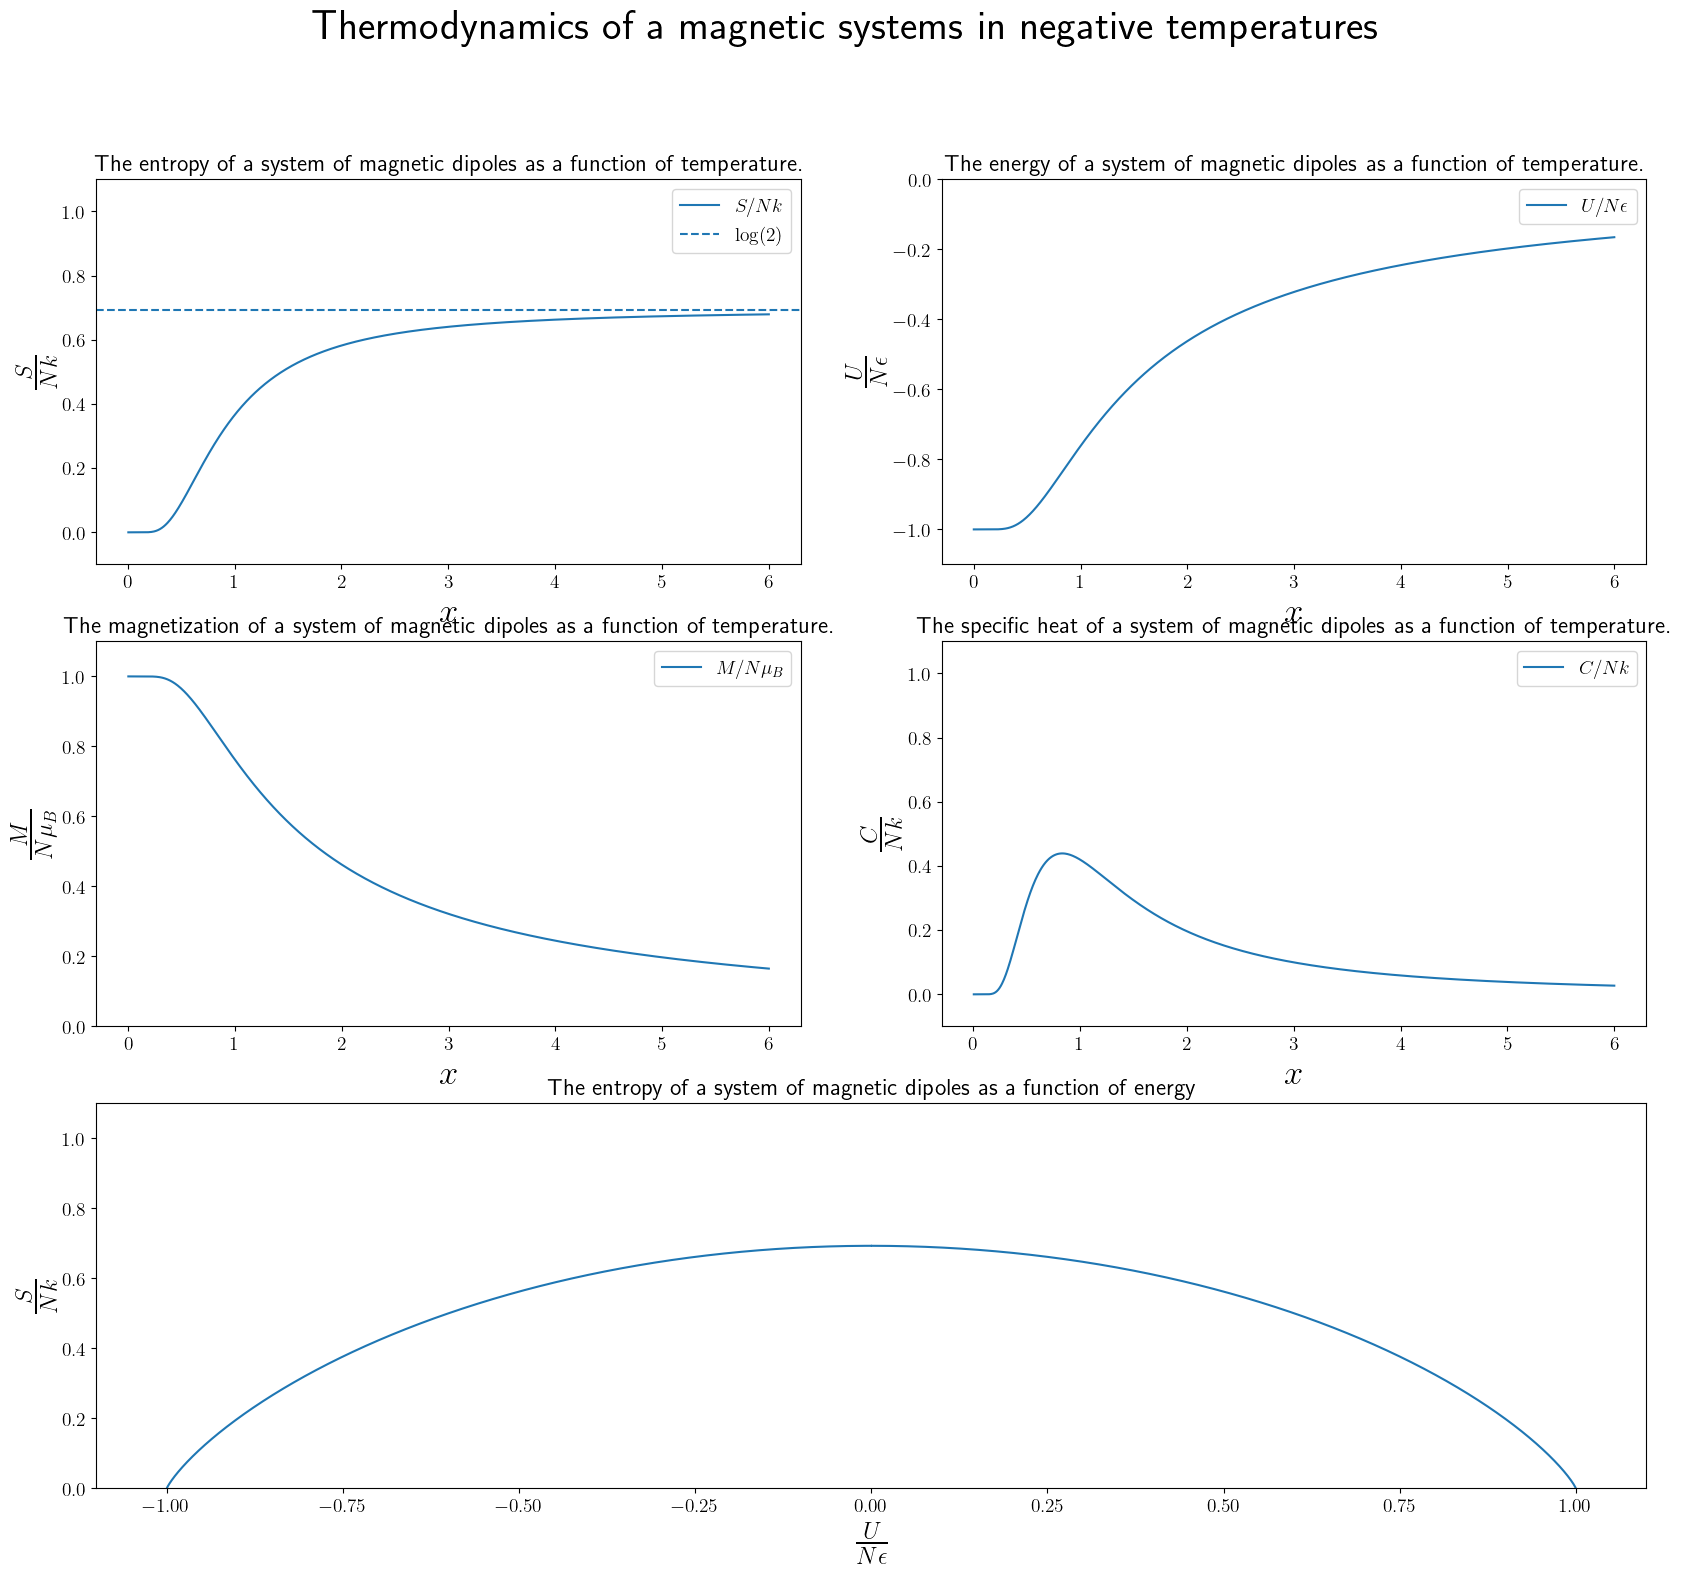

In [2]:
x=np.linspace(0,6,1000)

def S_Nk(x):
    return np.log(2*cosh(1/x))-(1/x)*tanh(1/x)

def U_NE(x):
    return -np.tanh(1/x)

def M_Nu(x):
    return np.tanh(1/x)

def C_Nk(x):
    return ((np.tanh(1/x)/np.sinh(1/x))/x)**2


fig = plt.figure(figsize = (20, 17))
gs=fig.add_gridspec(3,2)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[2,:])

ax1.plot(x, S_Nk(x), label=r'$S/Nk$')
ax1.axhline(np.log(2),linestyle='--', label=r'$\log (2)$')
ax1.set_title('The entropy of a system of magnetic dipoles as a function of temperature.')
ax1.set_ylabel(r'$\frac{S}{Nk}$', fontsize=25)
ax1.set_xlabel(r'$x$', fontsize=25)
ax1.set_ylim(-0.1,1.1)
ax1.legend()

ax2.plot(x, U_NE(x),  label=r'$U/N \epsilon$')
ax2.set_title('The energy of a system of magnetic dipoles as a function of temperature.')
ax2.set_ylabel(r'$\frac{U}{N\epsilon}$', fontsize=25)
ax2.set_xlabel(r'$x$', fontsize=25)
ax2.set_ylim(-1.1,0)
ax2.legend()

ax3.plot(x, M_Nu(x), label=r'$M/N \mu_B$')
ax3.set_title('The magnetization of a system of magnetic dipoles as a function of temperature.')
ax3.set_ylabel(r'$\frac{M}{N\mu_B}$', fontsize=25)
ax3.set_xlabel(r'$x$', fontsize=25)
ax3.set_ylim(0,1.1)
ax3.legend()

ax4.plot(x, C_Nk(x),  label=r'$C/Nk$')
ax4.set_title('The specific heat of a system of magnetic dipoles  as a function of temperature.')
ax4.set_ylabel(r'$\frac{C}{Nk}$', fontsize=25)
ax4.set_xlabel(r'$x$', fontsize=25)
ax4.set_ylim(-0.1,1.1)
ax4.legend()

x=np.linspace(-1001,1001,1000001)
ax5.plot(U_NE(x),S_Nk(x))
ax5.set_title('The entropy of a system of magnetic dipoles as a function of energy')
ax5.set_xlabel(r'$\frac{U}{N\epsilon}$', fontsize=25)
ax5.set_ylabel(r'$\frac{S}{Nk}$', fontsize=25)
ax5.set_ylim(0,1.1)
ax5.set_xlim(-1.1,1.1)

plt.suptitle('Thermodynamics of a magnetic systems in negative temperatures', fontsize=30)
plt.show()

Plot Planck’s law for Black Body radiation and compare it with Raleigh-Jeans Law and Wein's law at high temperature and low temperature

$\qquad\displaystyle{\text{Plank's law }:    u_{\lambda}\text{d}\lambda = \frac{8\pi hc}{\lambda ^5} \frac{1}{e^{hc/\lambda kT} -1}\text{d}\lambda}$

$\qquad\displaystyle{\text{Wein's law }:    u_{\lambda}\text{d}\lambda = \frac{8\pi hc}{\lambda ^5} \frac{1}{e^{hc/\lambda kT} }\text{d}\lambda}$

$\qquad\displaystyle{\text{Rayleigh-Jeans law }: u_{\lambda}\text{d}\lambda = \frac{8\pi kT}{\lambda ^4}\text{d}\lambda} $

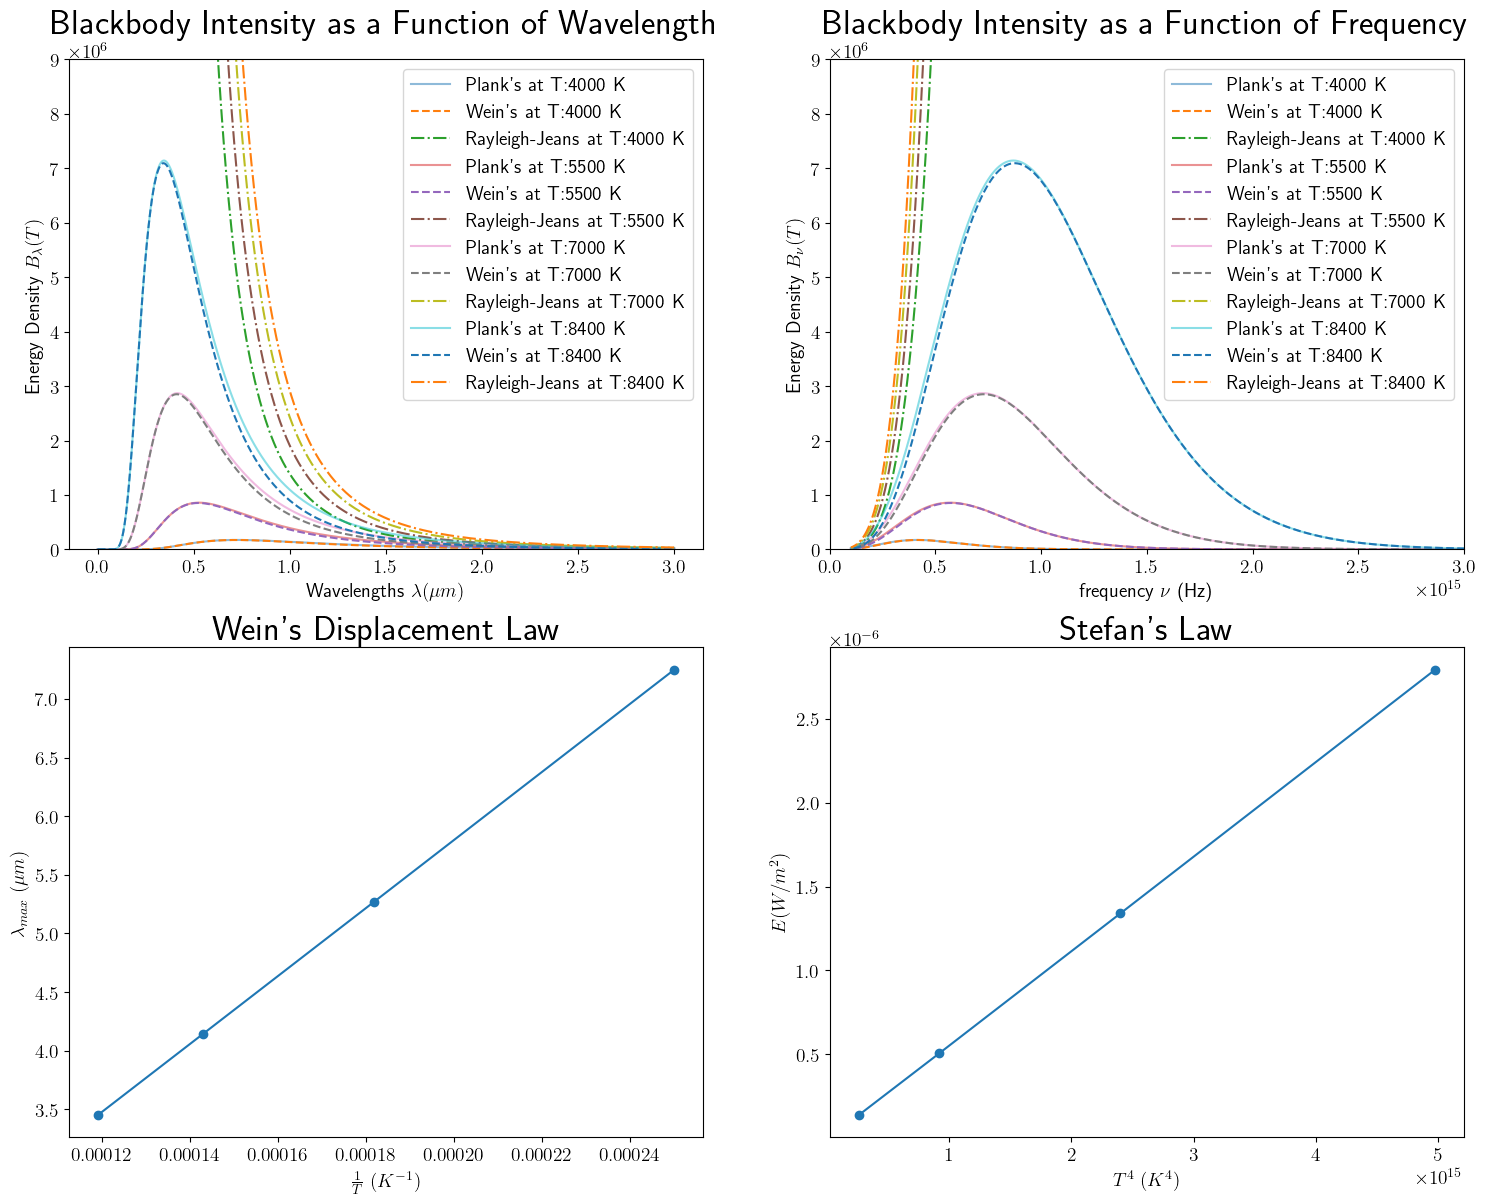

In [4]:
h = 6.626e-34              # Plank's const
c = 3.0e+8                 # speed of light
k = 1.38e-23               # Boltzmann constant (joule per kelvin)
H = 1e-9
wavelengths = np.arange(1e-9, 3e-6, H) 
frequencies = c / wavelengths

T = [ 4000.,5500.,7000., 8400.]
def Planck(wav, T):
    return (8.*np.pi*h*c)/((wav**5)*(np.exp((h*c)/(wav*k*T))-1.0))     # intensity

def Wein(wav,T):
    return (8*np.pi*h*c)/(wav**5 * np.exp((h*c)/(wav*k*T)))      

def Rayleigh_Jeans(wav,T):
    return (8*np.pi*k*T)/wav**4 

def slope(x,y):
    m, b = np.polyfit(x, y, 1)
    return m

wavelength_max = []  # Product of lambda_max and T
E=[]

fig = plt.figure(figsize = (18, 14))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

for j in range(len(T)):
   
    ax1.plot(wavelengths*1e6,Planck(wavelengths, T[j]),alpha=0.5,label="Plank's at T:%i K"%T[j])
    ax1.plot(wavelengths*1e6,Wein(wavelengths, T[j]), '--',label="Wein's at T:%i K"%T[j])
    ax1.plot(wavelengths*1e6, Rayleigh_Jeans(wavelengths, T[j]), '-.',alpha=1,label="Rayleigh-Jeans at T:%i K"%T[j])
    
    ax2.plot(frequencies , Planck(wavelengths, T[j]),alpha=0.5,label="Plank's at T:%i K"%T[j])
    ax2.plot(frequencies , Wein(wavelengths, T[j]), '--',label="Wein's at T:%i K"%T[j])
    ax2.plot(frequencies , Rayleigh_Jeans(wavelengths, T[j]), '-.',alpha=1,label="Rayleigh-Jeans at T:%i K"%T[j])
    
    p = Planck(wavelengths, T[j])  
    wavelength_max.append(wavelengths[np.argmax(p)]*1e7)
    E.append(H*1e-6*sum(p)*c/4 *1e-8)
    
ax1.set_title('Blackbody Intensity as a Function of Wavelength', fontsize=25)
ax1.legend(loc='best')
ax1.set_ylabel(r'Energy Density $B_{\lambda}(T)$')
ax1.set_xlabel(r'Wavelengths $\lambda(\mu m)$')
ax1.set_ylim(0,9e6)   

ax2.set_title('Blackbody Intensity as a Function of Frequency',fontsize=25)
ax2.legend(loc='best')
ax2.set_ylabel(r'Energy Density $B_{\nu}(T)$')
ax2.set_xlabel(r'frequency $\nu$ (Hz)')
ax2.set_ylim(0,9e6) 
ax2.set_xlim(0,3e15) 

ax3.plot(np.power(T,-1),wavelength_max,'o-')
ax3.set_title(r"Wein's Displacement Law ",fontsize=25)
ax3.set_xlabel(r'$\frac{1}{T} \ (K^{-1})$')
ax3.set_ylabel(r'$\lambda_{max} \ (\mu m)$')

ax4.plot(np.power(T,4), E,'o-')
ax4.set_title(r"Stefan's Law ",fontsize=25)
ax4.set_xlabel(r'$T^4 \ (K^4)$')
ax4.set_ylabel(r'$E (W/m^2)$')
plt.show()

Plot Specific Heat of Solids :                                                                                                    
$\qquad$(a) Dulong-Petit law,                                                                                                   
$\qquad$(b) Einstein distribution function,                                                                                                    
$\qquad$(c) Debye distribution function                                                                                                   
$\quad$ for high temperature and low temperature and compare them for these two cases.
 
$\quad$From Dulong and Petit's law : $\displaystyle{ C_V = 3Nk_B}$

$\quad$Debye’s theory suggest : $\quad \ \ \displaystyle{ { C_V= 9Nk_B {\large{u}}_D^3\int_0^{1/{\large{u}}_D} \frac{x^4 e^x}{(e^x-1)^2} dx}}$

$\quad$Einstein’s theory suggest:$\quad \ \ \displaystyle{C_V= 3Nk_Bu^2 \frac{ e^{{\large{u}}_E}}{(e^{{\large{u}}_E}-1)^2} \text{ where }{\large{u}}_E=\frac{1}{x}}$                                           
$\quad$The terms in this equation are                                                                                             
$\displaystyle{ \qquad\qquad N = \text{number of particles in the solid}}$                                                        
$\displaystyle{ \qquad\qquad k = \text{Boltzmann constant}}$                                                                                     
$\displaystyle{ \qquad\qquad T = \text{absolute temperature}}$                                                                      
$\displaystyle{ \qquad\qquad \Theta_E = \text{Einstein temperature} }$                                                             
$\displaystyle{ \qquad\qquad \Theta_D = \text{Debye temperature} }$                                                                  
$\displaystyle{ \qquad\qquad {\large{u}}_E = T/\Theta_E }$                                                                  
$\displaystyle{ \qquad\qquad {\large{u}}_D = T/\Theta_D }$ 

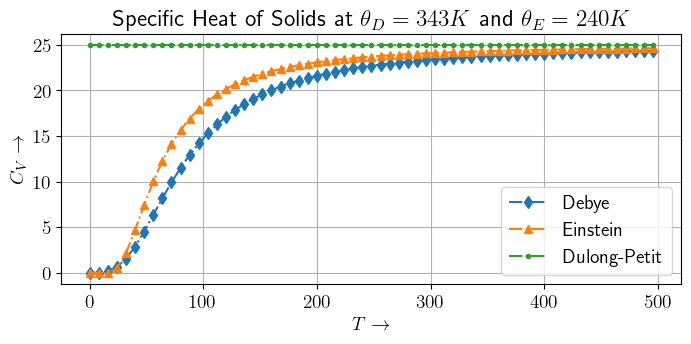

In [8]:
N = 6.023e23
k = 1.38e-23
T = np.arange(0.0, 501, 8)
theta_D = 343
theta_E = 240
uD = T / theta_D
uE = T / theta_E
Cv = np.zeros(len(T))

def fD(x):
    return (x**4) * np.exp(x) / (np.exp(x) - 1.0)**2 if x != 0 else 0.0

def fE(x):
    c = (np.pi/6)**(1/3)
    return c**2 * np.exp(c/x) / (np.exp(c/x) - 1)**2

gD = np.zeros(len(T))
gE = np.zeros(len(T))
gP = np.zeros(len(T)) 

for i in range(len(T)):
    gP[i] = 3 * N * k
    if i != 0: 
        gE[i] = (1/uE[i])**2 * fE(uE[i]) * 3 * N * k
        I = si.integrate.quad(lambda x: fD(x), 0, 1.0/uD[i], limit=2)[0]
        gD[i] = uD[i]**3 * I * 9 * N * k
        
plt.figure(figsize=(8, 3.25))
plt.plot(T, gD, 'd-.', label='Debye')
plt.plot(T, gE, '^-.', label='Einstein')
plt.plot(T, gP, '.-.', label='Dulong-Petit')
plt.xlabel(r'$T \rightarrow $')
plt.ylabel(r'$C_V \rightarrow $')
plt.legend()
plt.grid(True)
plt.title(r'Specific Heat of Solids at $\theta_D = {}K $ and $\theta_E = {}K $'.format(theta_D,theta_E))
plt.show()

Plot the following functions with energy at different temperatures                                                           
$\qquad$a) Maxwell-Boltzmann distribution                                                                                       
$\qquad$b) Fermi-Dirac distribution                                                                                                  
$\qquad$c) Bose-Einstein distribution

$\qquad\boxed{\displaystyle{f(T,\eta)= \frac{1}{e^{(\epsilon-\mu)e/kT} + \eta} \text{ where }} {\begin{equation*} \eta = \left\{\begin{array}{rl}  0 & \text{Maxwell-Boltzmann distribution },\\  1 & \text{Fermi-Dirac distribution },\\ -1 & \text{Bose-Einstein distribution }. \end{array} \right.\end{equation*}}}$

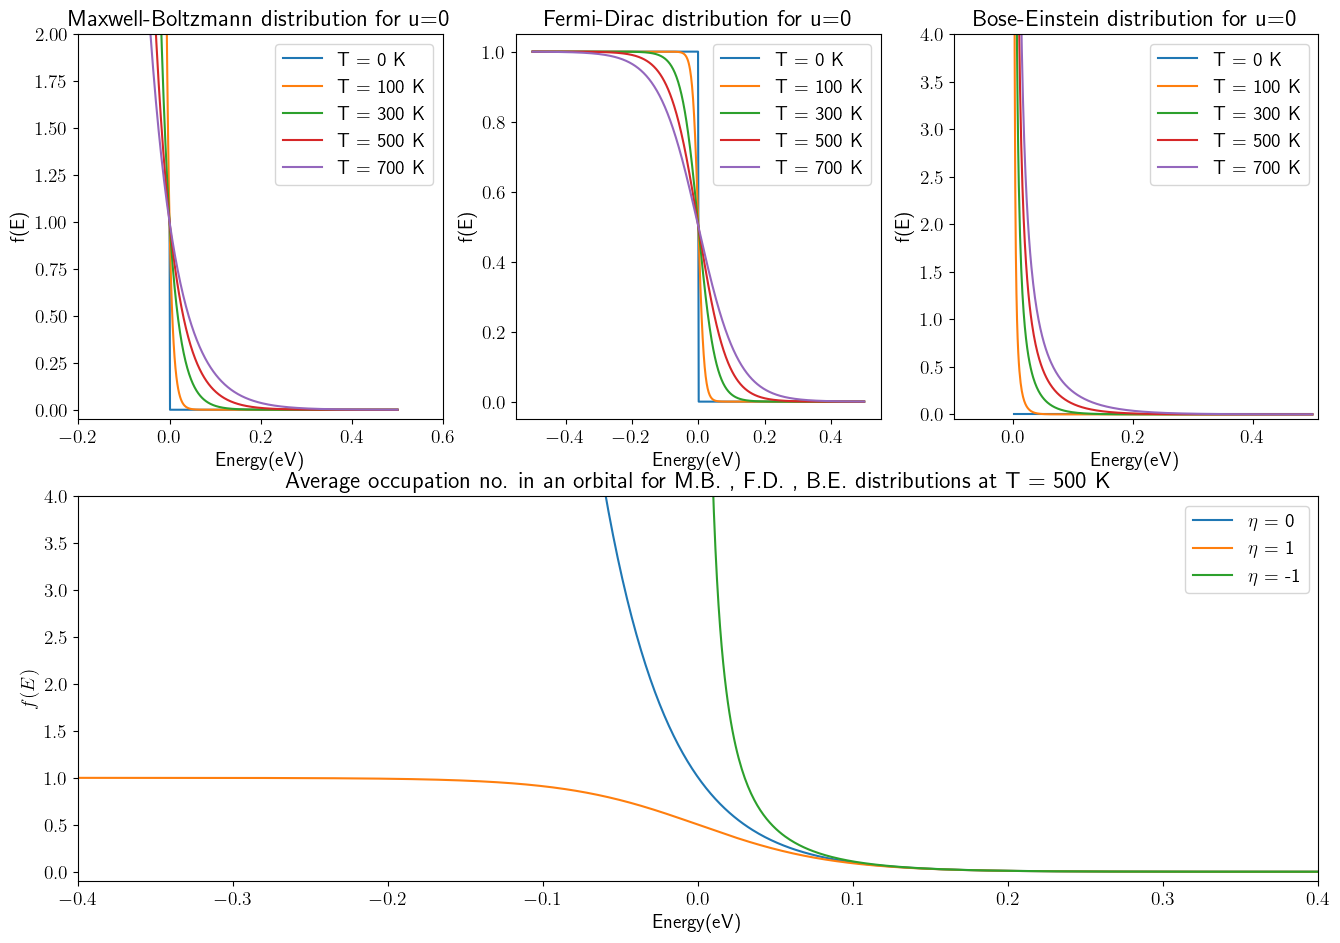

In [14]:
E = np.linspace(-0.5,0.5,1001) # energy range  
e = 1.6e-19                    # electric charge  
k = 1.38e-23                   # Boltzmann constant(joule per kelvin)  
u = 0                          # considering chemeical potential of the substance is zero 
T = [0.0001, 100.,300.,500.,700.]
system = [ 0, 1, -1]

def Fn(T,a):  
    return 1/((np.exp(((E-u)*e)/(k*T)))+a) 

fig = plt.figure(figsize = (16, 11))
gs=fig.add_gridspec(2,3)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])
ax4 = fig.add_subplot(gs[1,:])

for t in T:
    ax1.plot(E,Fn(t,0),label='T = %i K'%t)  
    ax2.plot(E,Fn(t,1),label='T = %i K'%t)
    ax3.plot(E,Fn(t,-1),label='T = %i K'%t)
    
ax1.set_ylim(-0.05,2) 
ax1.set_xlim(-0.2,0.6)  
ax1.set_xlabel('Energy(eV)')  
ax1.set_ylabel('f(E)')  
ax1.legend(loc='best')  
ax1.set_title("Maxwell-Boltzmann distribution for u=0")   

ax2.set_ylim(-0.05,1.05)    
ax2.set_xlabel('Energy(eV)')  
ax2.set_ylabel('f(E)')  
ax2.legend(loc='best')  
ax2.set_title("Fermi-Dirac distribution for u=0")

ax3.set_xlim(-0.1,0.51)  
ax3.set_ylim(-0.05,4)  
ax3.set_xlabel('Energy(eV)')  
ax3.set_ylabel('f(E)')  
ax3.legend(loc='best')  
ax3.set_title("Bose-Einstein distribution for u=0")

for s in system:
    ax4.plot(E,Fn(500,s),label='$\eta$ = %.d '%s)  
    
ax4.legend(loc='best')  
ax4.set_ylim(-0.1,4)  
ax4.set_xlim(-0.4,0.4)  
ax4.set_xlabel('Energy(eV)')  
ax4.set_ylabel('$f(E)$')  
ax4.set_title("Average occupation no. in an orbital for M.B. , F.D. , B.E. distributions at T = 500 K")
plt.show()